In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "K101.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Standardize column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Ensure data is sorted by Company and Year
df = df.sort_values(by=["Company", "Year"])

# List of financial metrics
metrics = ["Total revenue", "Net income", "Total Assets", "Total Liabilities", "Cash flow from Operating Activities"]

# Verify that all metrics exist
missing_metrics = [m for m in metrics if m not in df.columns]
if missing_metrics:
    raise KeyError(f"⚠️ Missing columns in data: {missing_metrics}")

# Calculate YoY percentage change
df_yoy = df.groupby("Company")[metrics].pct_change() * 100  

# Rename columns
df_yoy = df_yoy.add_suffix(" YoY % Change")

# Standardize YoY column names
df_yoy.columns = df_yoy.columns.str.strip()

# Merge back to the original dataframe
df_final = pd.concat([df, df_yoy], axis=1)

# Print available columns for debugging
print("Columns in df_final:", df_final.columns.tolist())




Columns in df_final: ['Company', 'Year', 'Total revenue', 'Net income', 'Total Assets', 'Total Liabilities', 'Cash flow from Operating Activities', 'Total revenue YoY % Change', 'Net income YoY % Change', 'Total Assets YoY % Change', 'Total Liabilities YoY % Change', 'Cash flow from Operating Activities YoY % Change']


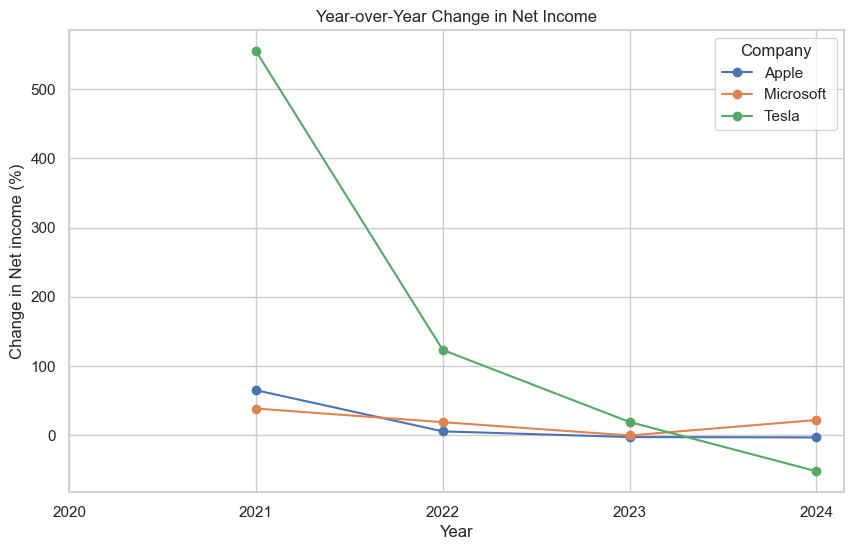

In [35]:
# Select the metric to visualize
metric_to_plot = "Net income YoY % Change"

# Drop NaN values (first year will have NaN)
df_final = df_final.dropna()

# Plot settings
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot each company's YoY change
for company in df["Company"].unique():
    subset = df_final[df_final["Company"] == company]
    plt.plot(subset["Year"], subset[metric_to_plot], marker="o", label=company)

# Formatting
plt.xlabel("Year")
plt.ylabel("Change in Net income (%)")
plt.title("Year-over-Year Change in Net Income")
plt.legend(title="Company")
plt.xticks(df["Year"].unique())  
plt.grid(True)

# Show plot
plt.show()

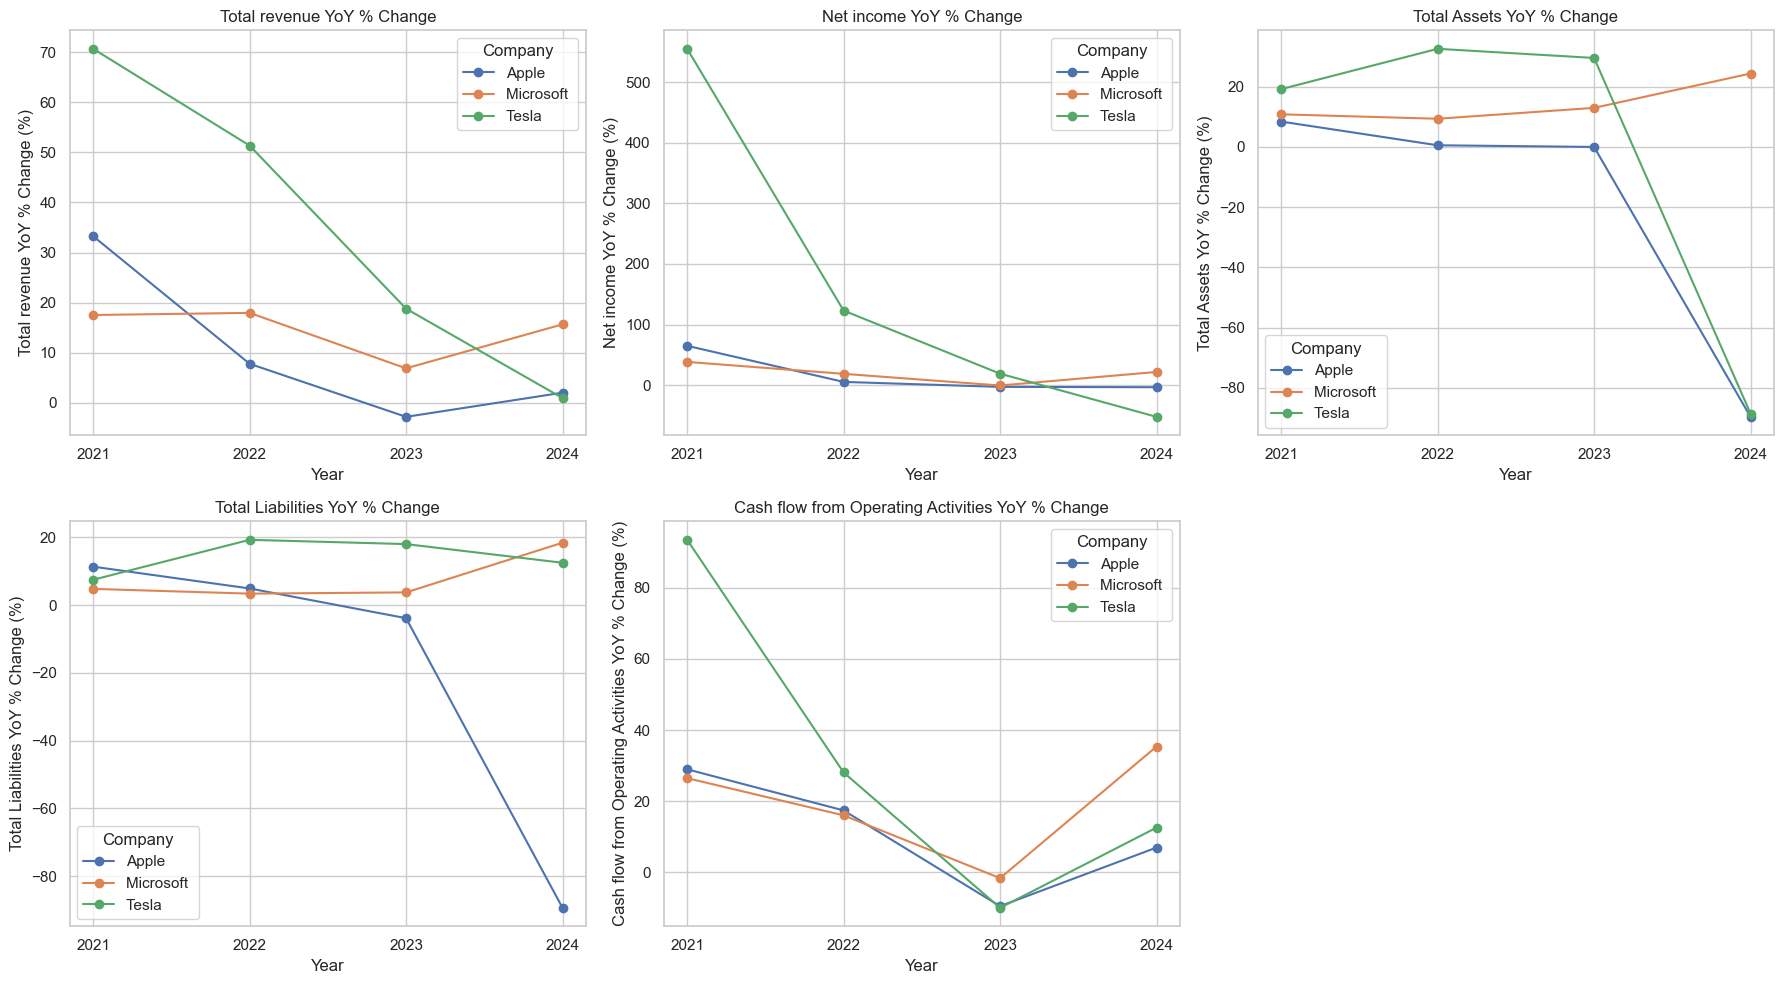

In [23]:
# List of financial metrics
metrics = ["Total revenue", "Net income", "Total Assets", "Total Liabilities", "Cash flow from Operating Activities"]

# Drop NaN values (first year will have NaN)
df_final = df_final.dropna()

# Metrics to plot
metrics_to_plot = [
    "Total revenue YoY % Change",
    "Net income YoY % Change",
    "Total Assets YoY % Change",
    "Total Liabilities YoY % Change",
    "Cash flow from Operating Activities YoY % Change"
]

# Set up a 2x3 grid of subplots (5 plots in total)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten to easily iterate (will use only first 5 slots)

# Plot each metric in a separate subplot
sns.set(style="whitegrid")
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]  # Select subplot
    for company in df_final["Company"].unique():
        subset = df_final[df_final["Company"] == company]
        ax.plot(subset["Year"], subset[metric], marker="o", label=company)

    # Formatting
    ax.set_xlabel("Year")
    ax.set_ylabel(f"{metric} (%)")
    ax.set_title(metric)
    ax.legend(title="Company")
    ax.set_xticks(df_final["Year"].unique())
    ax.grid(True)

# Remove the empty last subplot (since we only have 5 plots but a 2x3 grid)
fig.delaxes(axes[5])

# Adjust layout
plt.tight_layout()
plt.show()

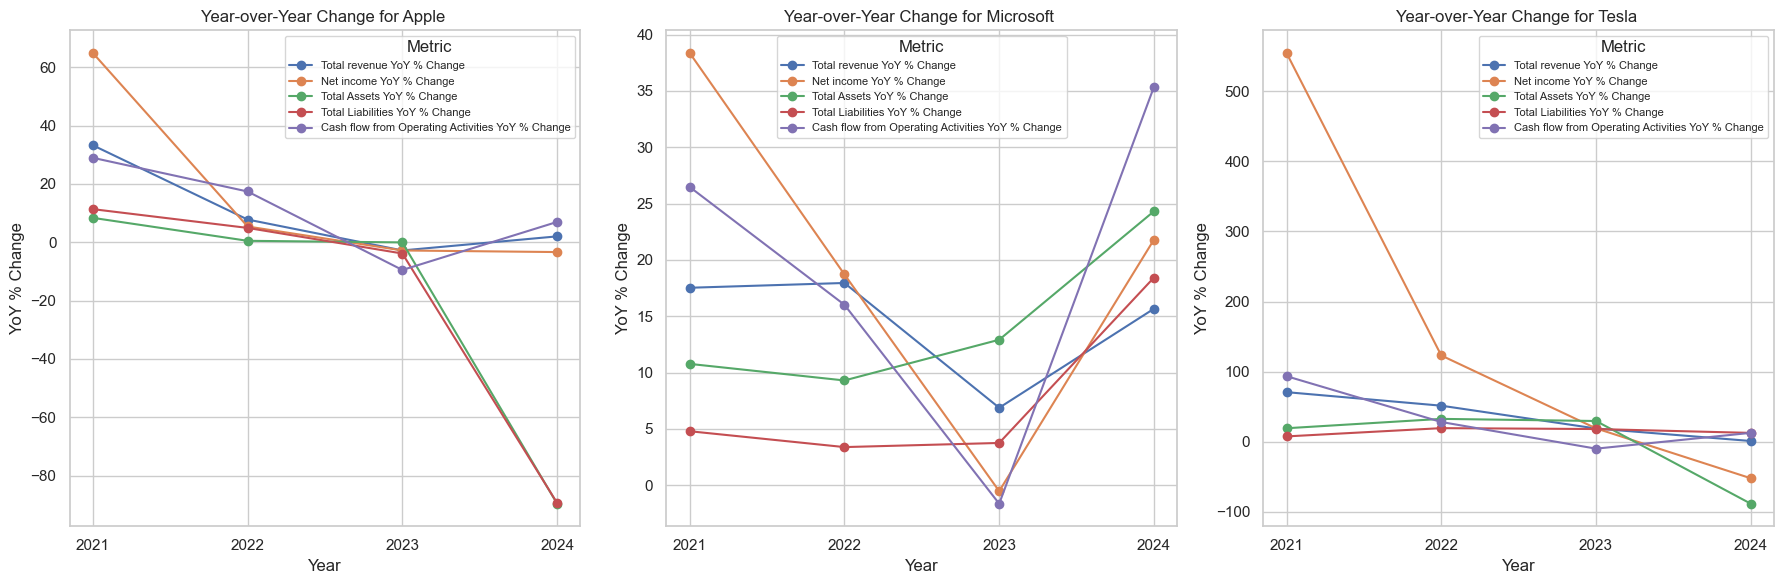

In [25]:
# Metrics to plot
metrics_to_plot = [
    "Total revenue YoY % Change",
    "Net income YoY % Change",
    "Total Assets YoY % Change",
    "Total Liabilities YoY % Change",
    "Cash flow from Operating Activities YoY % Change"
]

# Get unique company names
companies = df_final["Company"].unique()

# Create a figure with 3 subplots (one for each company)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
sns.set(style="whitegrid")

# Loop through each company and create a separate plot
for i, company in enumerate(companies):
    ax = axes[i]  # Select subplot
    subset = df_final[df_final["Company"] == company]

    # Plot all 5 metrics for the company
    for metric in metrics_to_plot:
        ax.plot(subset["Year"], subset[metric], marker="o", label=metric)

    # Formatting
    ax.set_xlabel("Year")
    ax.set_ylabel("YoY % Change")
    ax.set_title(f"Year-over-Year Change for {company}")
    ax.legend(title="Metric", fontsize=8)
    ax.set_xticks(df_final["Year"].unique())
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd

# Load the Excel file
file_path = "K101.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Standardize column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Ensure data is sorted by Company and Year
df = df.sort_values(by=["Company", "Year"])

# List of financial metrics
metrics = ["Total revenue", "Net income", "Total Assets", "Total Liabilities", "Cash flow from Operating Activities"]

# Calculate YoY percentage change
df_yoy = df.groupby("Company")[metrics].pct_change() * 100  

# Rename columns to indicate YoY change
df_yoy = df_yoy.add_suffix(" YoY % Change")

# Merge with original dataframe
df_final = pd.concat([df, df_yoy], axis=1)

# Drop NaN values (first year will have NaN)
df_final = df_final.dropna()

# Metrics to summarize
metrics_to_analyze = [
    "Total revenue YoY % Change",
    "Net income YoY % Change",
    "Total Assets YoY % Change",
    "Total Liabilities YoY % Change",
    "Cash flow from Operating Activities YoY % Change"
]

# Create a summary dictionary
summary = {}

# Loop through each company and analyze trends
for company in df_final["Company"].unique():
    company_data = df_final[df_final["Company"] == company]
    company_summary = {}

    for metric in metrics_to_analyze:
        max_change = company_data[metric].max()
        min_change = company_data[metric].min()
        avg_change = company_data[metric].mean()

        # Find the years where the max and min occurred
        max_year = company_data.loc[company_data[metric].idxmax(), "Year"]
        min_year = company_data.loc[company_data[metric].idxmin(), "Year"]

        company_summary[metric] = {
            "Max Change (%)": round(max_change, 2),
            "Max Year": int(max_year),
            "Min Change (%)": round(min_change, 2),
            "Min Year": int(min_year),
            "Avg Change (%)": round(avg_change, 2)
        }
    
    summary[company] = company_summary

# Print the summary
for company, metrics_summary in summary.items():
    print(f"\n📊 **Summary for {company}:**")
    for metric, values in metrics_summary.items():
        print(f"🔹 {metric}:")
        print(f"   📈 Highest: {values['Max Change (%)']}% in {values['Max Year']}")
        print(f"   📉 Lowest: {values['Min Change (%)']}% in {values['Min Year']}")
        print(f"   📊 Average Change: {values['Avg Change (%)']}%")




📊 **Summary for Apple :**
🔹 Total revenue YoY % Change:
   📈 Highest: 33.26% in 2021
   📉 Lowest: -2.8% in 2023
   📊 Average Change: 10.07%
🔹 Net income YoY % Change:
   📈 Highest: 64.92% in 2021
   📉 Lowest: -3.36% in 2024
   📊 Average Change: 16.04%
🔹 Total Assets YoY % Change:
   📈 Highest: 8.37% in 2021
   📉 Lowest: -89.65% in 2024
   📊 Average Change: -20.21%
🔹 Total Liabilities YoY % Change:
   📈 Highest: 11.36% in 2021
   📉 Lowest: -89.39% in 2024
   📊 Average Change: -19.24%
🔹 Cash flow from Operating Activities YoY % Change:
   📈 Highest: 28.96% in 2021
   📉 Lowest: -9.5% in 2023
   📊 Average Change: 10.96%

📊 **Summary for Microsoft :**
🔹 Total revenue YoY % Change:
   📈 Highest: 17.96% in 2022
   📉 Lowest: 6.88% in 2023
   📊 Average Change: 14.51%
🔹 Net income YoY % Change:
   📈 Highest: 38.37% in 2021
   📉 Lowest: -0.52% in 2023
   📊 Average Change: 19.59%
🔹 Total Assets YoY % Change:
   📈 Highest: 24.32% in 2024
   📉 Lowest: 9.31% in 2022
   📊 Average Change: 14.33%
🔹 Tot

In [ ]:
# Key Insights Summary
# Apple experienced its strongest growth in 2021, with total revenue rising by 33.26% and net income surging by 64.92%. However, 2024 saw a massive decline in total assets (-89.65%) and liabilities (-89.39%), suggesting major restructuring or asset divestment.
# Microsoft showed steady growth, with total revenue peaking in 2022 (17.96%) and net income reaching its highest in 2021 (38.37%). In 2024, it saw its largest increase in total assets (24.32%) and cash flow (35.36%), indicating financial strength.
# Tesla had explosive growth in 2021, with net income skyrocketing by 554.76% and cash flow jumping by 93.45%, reflecting rapid expansion. However, 2024 was a tough year, with net income plummeting by -52.23% and total assets dropping by -88.55%, signaling potential financial instability.
# Overall: 2021 was a strong year for all three companies, but Tesla showed the most extreme volatility, while Microsoft remained the most stable. Apple and Tesla saw major asset declines in 2024, possibly indicating strategic shifts.